In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

## Missing values

In [ ]:
#finding all the features with missing values
feature_with_na = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>0]
print(feature_with_na)

for feature in feature_with_na:
  print('Number of null values in ',feature,' = ',df_train[feature].isnull().sum() )

['Age', 'Cabin', 'Embarked']
Number of null values in  Age  =  177
Number of null values in  Cabin  =  687
Number of null values in  Embarked  =  2


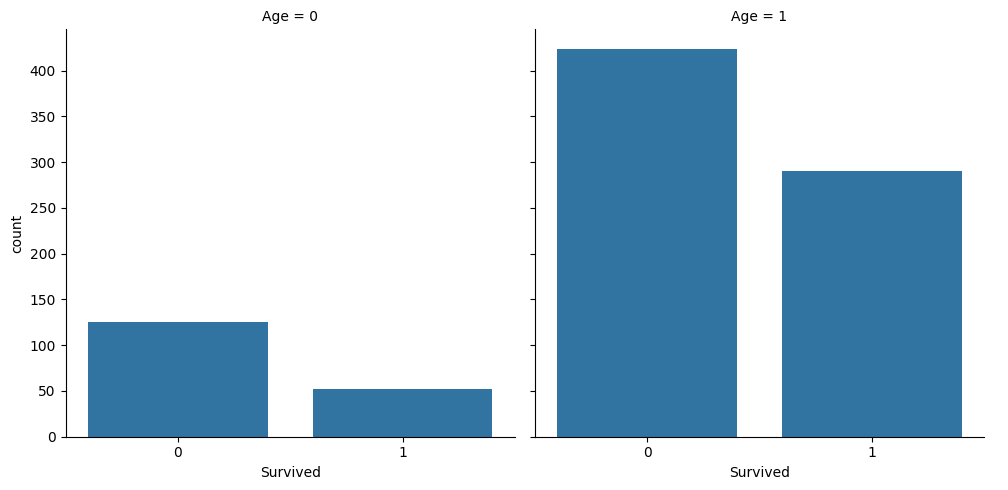

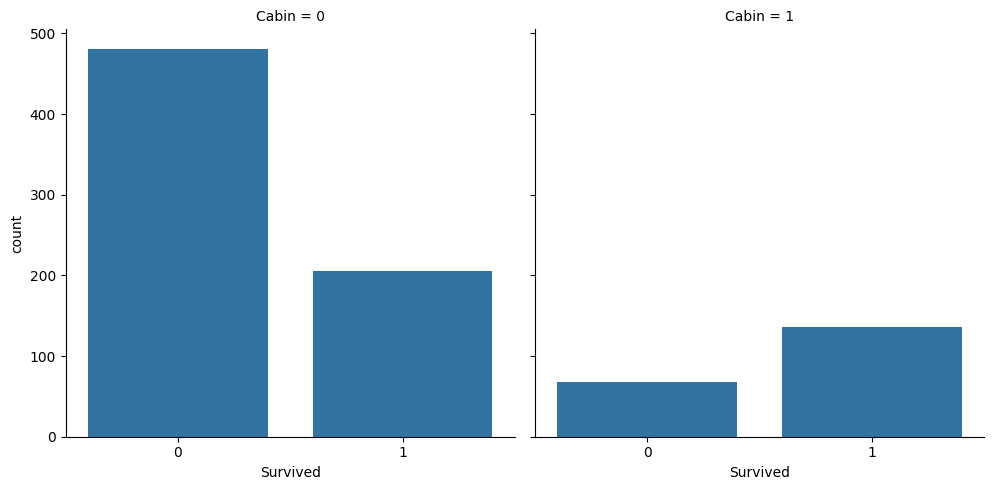

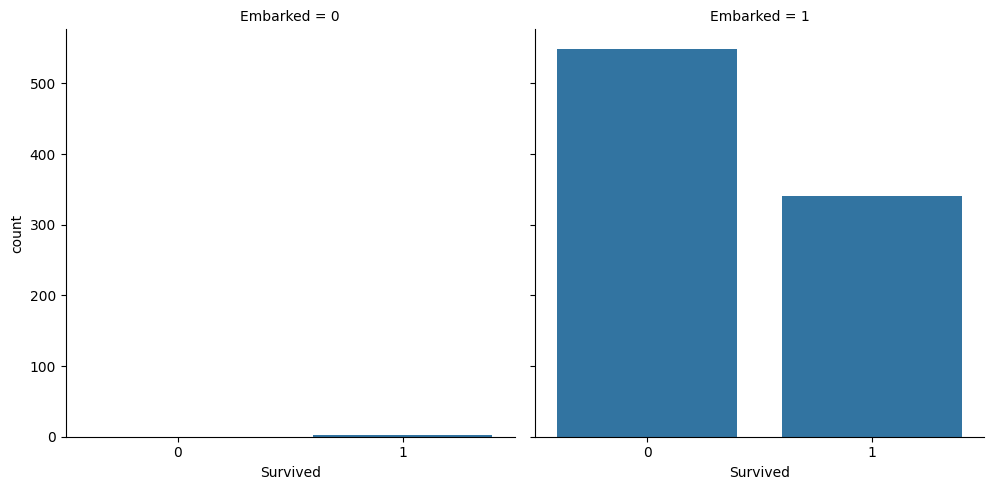

In [ ]:
#graphs to visualize relation between missing values and target
data = df_train.copy()
for feature in feature_with_na:


    # make a variable that indicates 0 if the observation was missing or 1 otherwise
    data[feature] = np.where(data[feature].isnull(), 0, 1)
    sns.catplot(x='Survived',col=feature,kind='count',data = data)

## Numerical features

In [ ]:
#listing all features with numerical data
num_feature = [feature for feature in df_train.columns if df_train[feature].dtype != 'object']
num_feature

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
df_train[num_feature].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
#finding out the number of discrete values present in each column of df_train
for feature in df_train.columns:
  print('Number of unique values in ', feature, ' = ', len(df_train[feature].unique()))

Number of unique values in  PassengerId  =  891
Number of unique values in  Survived  =  2
Number of unique values in  Pclass  =  3
Number of unique values in  Name  =  891
Number of unique values in  Sex  =  2
Number of unique values in  Age  =  89
Number of unique values in  SibSp  =  7
Number of unique values in  Parch  =  7
Number of unique values in  Ticket  =  681
Number of unique values in  Fare  =  248
Number of unique values in  Cabin  =  148
Number of unique values in  Embarked  =  4


### Discrete features

In [ ]:
#discrete and continuous numerical features
for feature in num_feature:
    print('no. of unique features in',feature,'=',len(df_train[feature].unique()))



no. of unique features in PassengerId = 891
no. of unique features in Survived = 2
no. of unique features in Pclass = 3
no. of unique features in Age = 89
no. of unique features in SibSp = 7
no. of unique features in Parch = 7
no. of unique features in Fare = 248


In [ ]:
#listing all the discrete numerical features
discrete_feature=[feature for feature in num_feature if len(df_train[feature].unique())<=7]
print(discrete_feature)

['Survived', 'Pclass', 'SibSp', 'Parch']


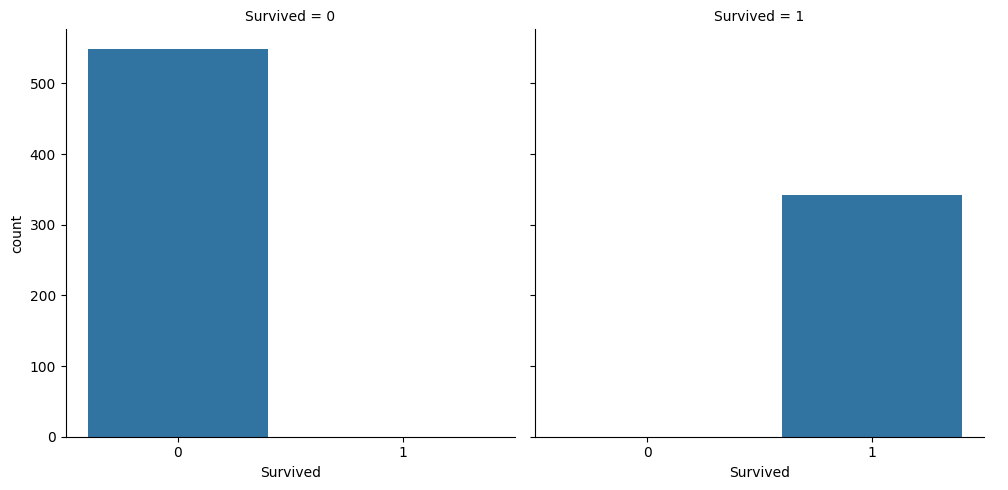

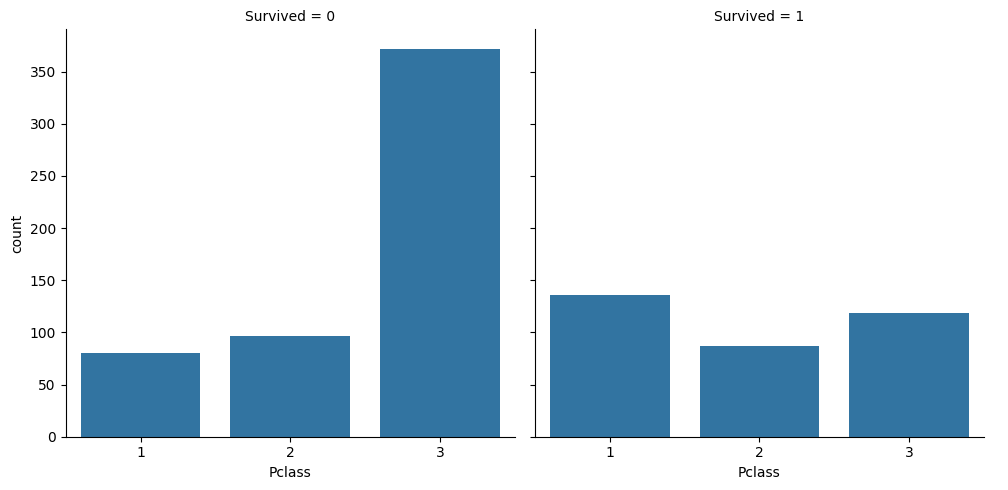

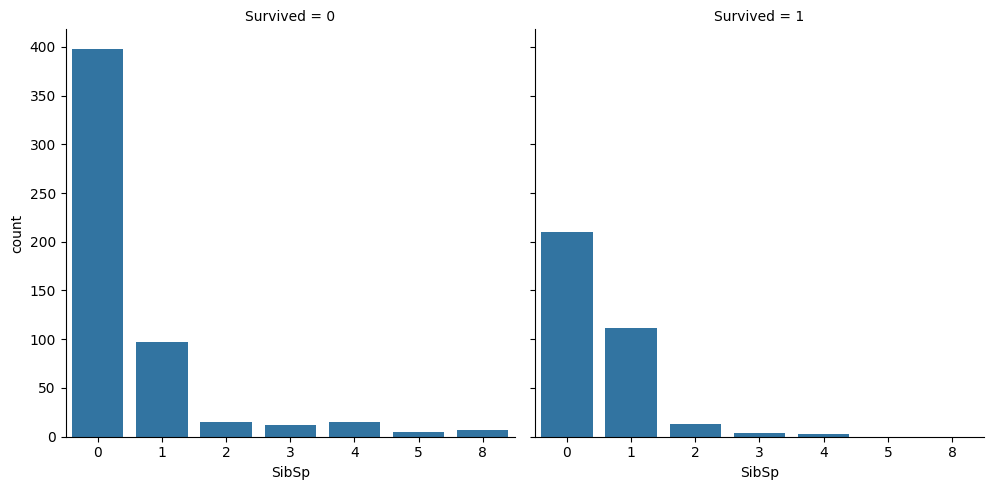

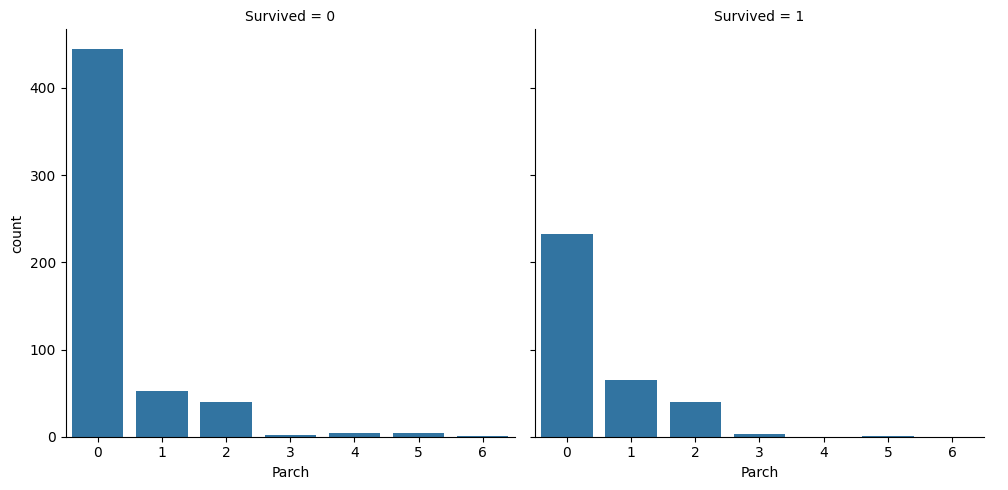

In [ ]:
for feature in discrete_feature:
  sns.catplot(x = feature, col = 'Survived',data = df_train, kind = 'count')

### Continuous features

In [ ]:
#listing all continuous features
continuous_feature=[feature for feature in num_feature if feature not in discrete_feature]
print(continuous_feature)

['PassengerId', 'Age', 'Fare']


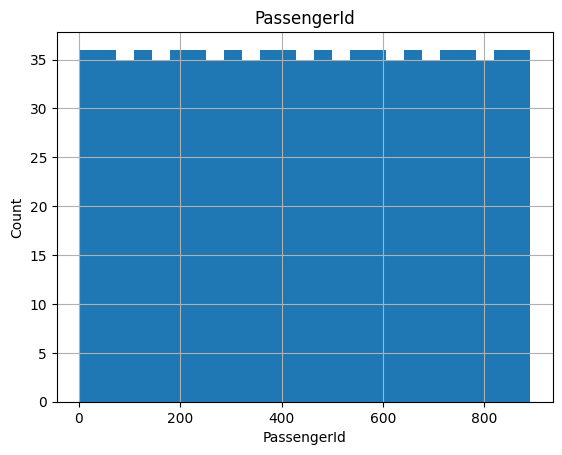

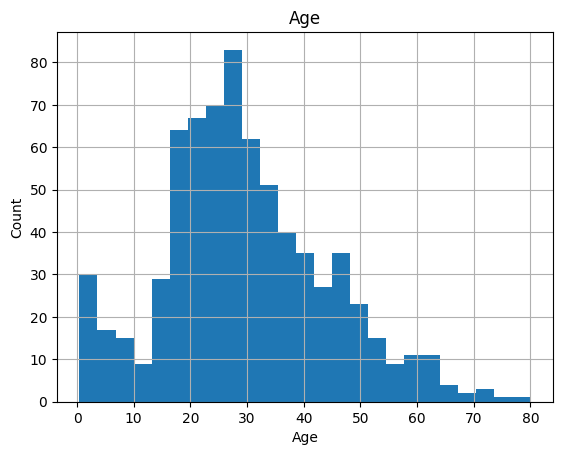

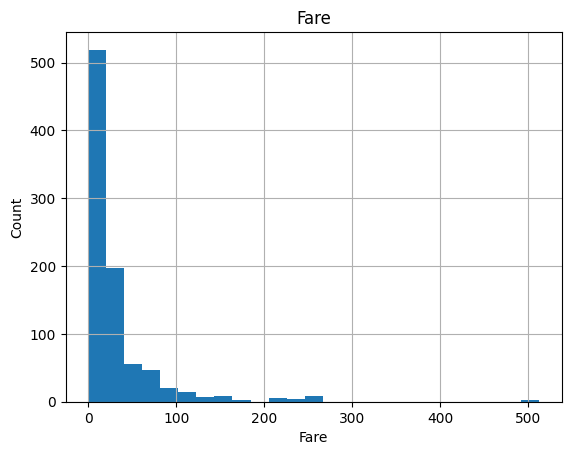

In [ ]:
for feature in continuous_feature:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Categorical features

In [ ]:
#all the categorical features
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes == 'O']

In [ ]:
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
df_train[categorical_features].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
for feature in categorical_features:
  print('Number of unique values in ', feature, ' = ', len(df_train[feature].unique()))

Number of unique values in  Name  =  891
Number of unique values in  Sex  =  2
Number of unique values in  Ticket  =  681
Number of unique values in  Cabin  =  148
Number of unique values in  Embarked  =  4


## Outliners

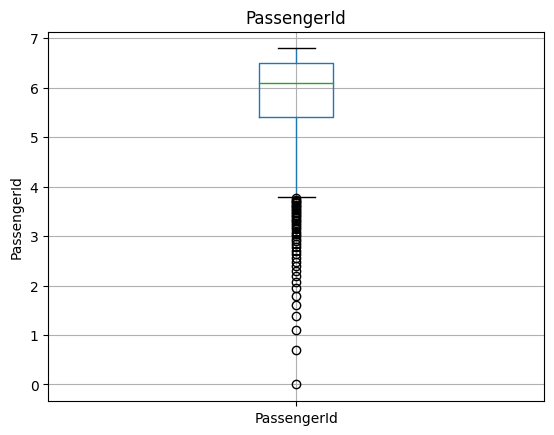

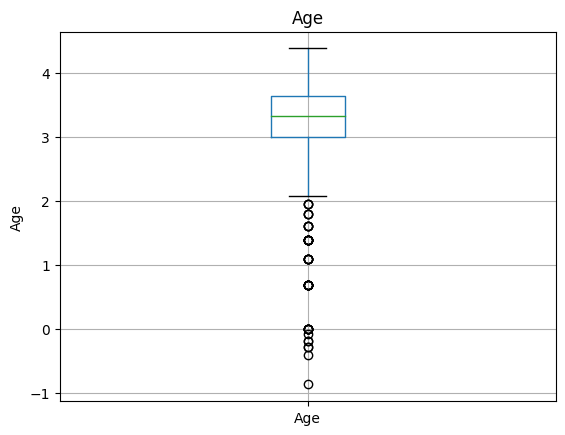

In [ ]:
# values at the most extreme(outline)
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


# Feature Engineering

In [ ]:
survived_train = df_train.Survived
dataset = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [ ]:
dataset.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [ ]:
#first handling all the categorical feature with missing values
feature_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == 'O']
feature_nan


['Cabin', 'Embarked']

In [ ]:
dataset['Cabin'] = np.where(dataset[feature].isnull(), 0, 1)

In [ ]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
# now missing values of numerical values are checked
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum() and dataset[feature].dtypes != 'O']
numerical_with_nan

['Age', 'Fare']

In [ ]:
#replacing the numerical missing values
for feature in numerical_with_nan:
  median_value = dataset[feature].median()

  dataset[feature].fillna(median_value,inplace = True)



In [ ]:
dataset[numerical_with_nan].isnull().sum()

Age     0
Fare    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Cabin     1309 non-null   int64  
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [ ]:
#Binning of numerical values
dataset['CatAge'] = pd.qcut(dataset.Age, q=4, labels=False )
dataset['CatFare']= pd.qcut(dataset.Fare, q=4, labels=False)
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,1,S,0,0
1,1,female,38.0,1,0,71.2833,1,C,3,3
2,3,female,26.0,0,0,7.9250,1,S,1,1
3,1,female,35.0,1,0,53.1000,1,S,2,3
4,3,male,35.0,0,0,8.0500,1,S,2,1


In [ ]:
# Dropping the 'Age' and 'Fare' columns
dataset = dataset.drop(['Age', 'Fare'], axis=1)
dataset.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,CatAge,CatFare
0,3,male,1,0,1,S,0,0
1,1,female,1,0,1,C,3,3
2,3,female,0,0,1,S,1,1
3,1,female,1,0,1,S,2,3
4,3,male,0,0,1,S,2,1


In [ ]:
# Create column of number of Family members onboard
dataset['Family_Size'] = dataset.Parch + dataset.SibSp

# Drop columns
dataset = dataset.drop(['SibSp','Parch'], axis=1)
dataset.head()

,Pclass,Sex,Cabin,Embarked,CatAge,CatFare,Family_Size
0,3,male,1,S,0,0,1
1,1,female,1,C,3,3,1
2,3,female,1,S,1,1,0
3,1,female,1,S,2,3,1
4,3,male,1,S,2,1,0


In [ ]:
# Transform all variables to numerical variables
data_dum = pd.get_dummies(dataset, drop_first=True)
data_dum.head()

,Pclass,Cabin,CatAge,CatFare,Family_Size,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,0,1,True,False,True
1,1,1,3,3,1,False,False,False
2,3,1,1,1,0,False,False,True
3,1,1,2,3,1,False,False,True
4,3,1,2,1,0,True,False,True


In [ ]:
#splitting the train and test sets
X_train = data_dum.iloc[:891]
X_test = data_dum.iloc[891:]


In [297]:
y_train = survived_train